In [7]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import LabelEncoder

In [8]:
#load music.csv dataset 
data=pd.read_csv('kyphosis.csv')

In [9]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [10]:
data.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [11]:
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [13]:
# Label Encoding
le=LabelEncoder()

# Encoding geography
le.fit(data.Kyphosis)
data.Kyphosis=le.transform(data.Kyphosis)

In [14]:
data

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


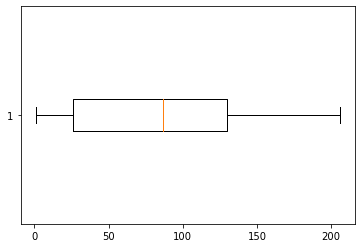

In [15]:
plt.boxplot(data['Age'],vert=False)
plt.show()

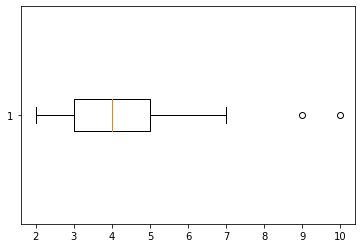

In [16]:
plt.boxplot(data['Number'],vert=False)
plt.show()

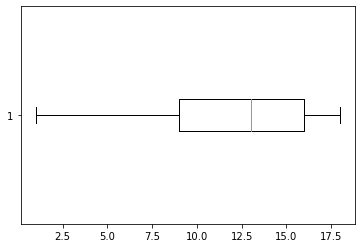

In [17]:
plt.boxplot(data['Start'],vert=False)
plt.show()

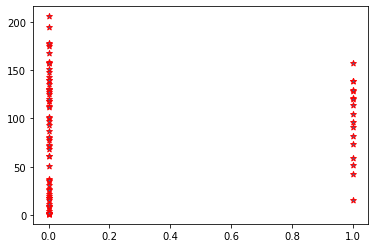

In [18]:
plt.scatter(data['Kyphosis'],data['Age'],marker='*',edgecolors="red")
plt.show()

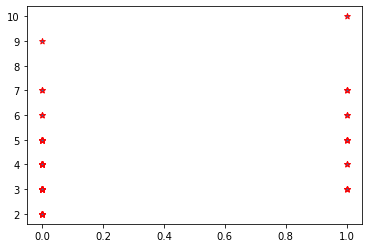

In [19]:
plt.scatter(data['Kyphosis'],data['Number'],marker='*',edgecolors="red")
plt.show()

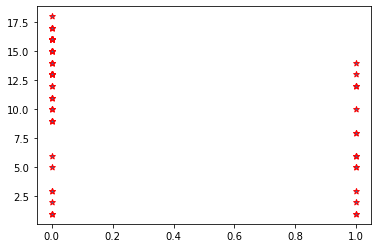

In [20]:
plt.scatter(data['Kyphosis'],data['Start'],marker='*',edgecolors="red")
plt.show()

In [40]:
# create input Dataset 
X= data.drop(columns=['Kyphosis'])
# create output dataset
y= data['Kyphosis']

In [43]:
# Give training and testing dataset to model 
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

#initiate the DecisionTreeClassifier 
model_d= DecisionTreeClassifier()

#initiate the LogisticRegression 
model_l= LogisticRegression()

# Train the DecisionTreeClassifier model with 80% of training data 
model_d= model_d.fit(X_train,y_train)

# Train the LogisticRegression model with 80% of training data 
model_l= model_l.fit(X_train,y_train)

# Test DecisionTreeClassifier model predtiction  
predictions_d =model_d.predict(X_test)

# Test LogisticRegression model predtiction  
predictions_l =model_l.predict(X_test)

#check the DecisionTreeClassifier accuracy score  
score_d = accuracy_score(y_test,predictions_d)

#check the LogisticRegression accuracy score  
score_l = accuracy_score(y_test,predictions_l)

print("Score using DecisionTreeClassifier",score_d)
print("Score using LogisticRegression",score_l)

Score using DecisionTreeClassifier 0.6470588235294118
Score using LogisticRegression 0.8235294117647058


In [45]:
cm_d=confusion_matrix(y_test,predictions_d)
cm_d

array([[9, 2],
       [4, 2]], dtype=int64)

In [46]:
cm_l=confusion_matrix(y_test,predictions_l)
cm_l

array([[11,  0],
       [ 3,  3]], dtype=int64)

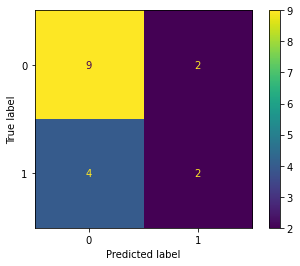

In [52]:
disp_d = ConfusionMatrixDisplay(confusion_matrix=cm_d, display_labels=model_d.classes_)
disp_d.plot()
plt.show()

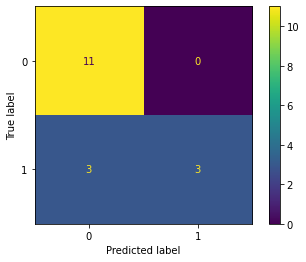

In [53]:
disp_l = ConfusionMatrixDisplay(confusion_matrix=cm_l, display_labels=model_l.classes_)
disp_l.plot()
plt.show()

In [54]:
print(classification_report(y_test,predictions_d))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.50      0.33      0.40         6

    accuracy                           0.65        17
   macro avg       0.60      0.58      0.58        17
weighted avg       0.62      0.65      0.63        17



In [55]:
print(classification_report(y_test,predictions_l))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.50      0.67         6

    accuracy                           0.82        17
   macro avg       0.89      0.75      0.77        17
weighted avg       0.86      0.82      0.80        17

